In [1]:
import pandas as pd
import zipfile
import io
data_path = "/Users/emrecavus/Desktop/445_Project/TRAIN_RELEASE_3SEP2025.zip"

In [2]:
columns = {}

with zipfile.ZipFile(data_path, 'r') as z:
    all_files = z.namelist()

    # Filter only TRAIN_RELEASE_3SEP2025 CSVs
    csv_files = [
        f for f in all_files 
        if f.startswith('TRAIN_RELEASE_3SEP2025/') and f.endswith('.csv')
    ]

    for csv_file in csv_files:
        with z.open(csv_file) as f:
            df = pd.read_csv(f)
            # Store the *filename* and its columns
            columns[csv_file] = list(df.columns)

# Print example
for k, v in columns.items():
    print(k, "=>", v)


TRAIN_RELEASE_3SEP2025/train_subtask2b_user_disposition_change.csv => ['user_id', 'disposition_change_valence', 'disposition_change_arousal']
TRAIN_RELEASE_3SEP2025/trial_data.csv => ['user_id', 'text_id', 'text', 'timestamp', 'collection_phase', 'is_words', 'valence', 'arousal', 'text_per_user']
TRAIN_RELEASE_3SEP2025/train_subtask2a.csv => ['user_id', 'text_id', 'text', 'timestamp', 'collection_phase', 'is_words', 'valence', 'arousal', 'state_change_valence', 'state_change_arousal']
TRAIN_RELEASE_3SEP2025/train_subtask2b.csv => ['user_id', 'text_id', 'text', 'timestamp', 'valence', 'arousal', 'group', 'disposition_change_valence', 'disposition_change_arousal']
TRAIN_RELEASE_3SEP2025/train_subtask1.csv => ['user_id', 'text_id', 'text', 'timestamp', 'collection_phase', 'is_words', 'valence', 'arousal']
TRAIN_RELEASE_3SEP2025/train_subtask2b_detailed.csv => ['user_id', 'text_id', 'text', 'timestamp', 'collection_phase', 'is_words', 'valence', 'arousal', 'text_num', 'num_texts_per_user',

In [3]:
# Going with train_subtask1.csv, train_subtask2a.csv, train_subtask2b.csv first
def read_from_zip(zip_path, inner_path):
    with zipfile.ZipFile(zip_path, 'r') as z:
        with z.open(inner_path) as f:
            return pd.read_csv(f)

df1 = read_from_zip(data_path, "TRAIN_RELEASE_3SEP2025/train_subtask1.csv")
df2 = read_from_zip(data_path, "TRAIN_RELEASE_3SEP2025/train_subtask2a.csv")
df3 = read_from_zip(data_path, "TRAIN_RELEASE_3SEP2025/train_subtask2b.csv")


In [4]:
df1.head()

,user_id,text_id,text,timestamp,collection_phase,is_words,valence,arousal
0,3,251,I ' ve been feeling just fine . Nice and relax...,2021-06-08 12:26:16,1,False,1.0,1.0
1,3,252,I ' ve been feeling pretty good . This is my l...,2021-06-09 13:41:40,1,False,0.0,1.0
2,3,253,Still feeling sick today and sneezing alot wit...,2021-06-11 15:13:48,1,False,1.0,1.0
3,3,254,I ' m still feeling kinda sickly but I powered...,2021-06-12 12:20:03,1,False,1.0,1.0
4,3,255,I ' m feeling so much better today ! Seems lik...,2021-06-13 14:54:41,1,False,2.0,1.0


In [5]:
df2.head()

,user_id,text_id,text,timestamp,collection_phase,is_words,valence,arousal,state_change_valence,state_change_arousal
0,1,200,I feel good . I caught up on some sleep . Wo...,2021-06-09 12:41:57,1,False,2.0,1.0,0.0,0.0
1,1,201,I’ve been feeling good for days and days . I r...,2021-06-11 12:01:45,1,False,2.0,1.0,-2.0,0.0
2,1,202,I’ve been feeling fine personally . I’ve been ...,2021-06-13 13:15:07,1,False,0.0,1.0,2.0,0.0
3,1,203,I feel great . I’ve had a day off . I’m going ...,2021-06-16 12:03:12,1,False,2.0,1.0,0.0,1.0
4,1,204,I feel great today . I am well rested . I have...,2021-06-17 12:38:38,1,False,2.0,2.0,NaN,NaN


In [6]:
df3.head()

,user_id,text_id,text,timestamp,valence,arousal,group,disposition_change_valence,disposition_change_arousal
0,1,200,I feel good . I caught up on some sleep . Wo...,2021-06-09 12:41:57,2.0,1.0,1,0.666667,0.5
1,1,201,I’ve been feeling good for days and days . I r...,2021-06-11 12:01:45,2.0,1.0,1,0.666667,0.5
2,1,202,I’ve been feeling fine personally . I’ve been ...,2021-06-13 13:15:07,0.0,1.0,1,0.666667,0.5
3,1,203,I feel great . I’ve had a day off . I’m going ...,2021-06-16 12:03:12,2.0,1.0,2,0.666667,0.5
4,1,204,I feel great today . I am well rested . I have...,2021-06-17 12:38:38,2.0,2.0,2,0.666667,0.5


In [7]:
print(f"Length of DF1: {len(df1)}")
print(f"Length of DF2: {len(df2)}")
print(f"Length of DF3: {len(df3)}")

Length of DF1: 2764
Length of DF2: 2764
Length of DF3: 2764


In [8]:
df1["user_id"].describe()

count    2764.000000
mean       75.847323
std        54.044222
min         1.000000
25%        33.000000
50%        63.000000
75%       124.000000
max       182.000000
Name: user_id, dtype: float64

In [9]:
df2["user_id"].describe()

count    2764.000000
mean       75.847323
std        54.044222
min         1.000000
25%        33.000000
50%        63.000000
75%       124.000000
max       182.000000
Name: user_id, dtype: float64

In [10]:
# Same user id's and text id's are included in all three dataframes. So, we can combine them under the same dataframe
# Common fields in all of the dataframes = user_id, text_id, text, timestamp, valence, arousal
# So, we can concatanate on these fields 

In [11]:
# Concatting df1 and df2 on their common fields
df1 = pd.merge(df1, df2, on = ['user_id', 'text_id', 'text', 'timestamp', 'valence', 'arousal', 'is_words', 'collection_phase'], how = 'left')

In [12]:
df1.head()

,user_id,text_id,text,timestamp,collection_phase,is_words,valence,arousal,state_change_valence,state_change_arousal
0,3,251,I ' ve been feeling just fine . Nice and relax...,2021-06-08 12:26:16,1,False,1.0,1.0,-1.0,0.0
1,3,252,I ' ve been feeling pretty good . This is my l...,2021-06-09 13:41:40,1,False,0.0,1.0,1.0,0.0
2,3,253,Still feeling sick today and sneezing alot wit...,2021-06-11 15:13:48,1,False,1.0,1.0,0.0,0.0
3,3,254,I ' m still feeling kinda sickly but I powered...,2021-06-12 12:20:03,1,False,1.0,1.0,1.0,0.0
4,3,255,I ' m feeling so much better today ! Seems lik...,2021-06-13 14:54:41,1,False,2.0,1.0,NaN,NaN


In [13]:
# Concatting resultant df1 and df3 on their common fields
df1 = pd.merge(df1, df3, on = ['user_id', 'text_id', 'text', 'timestamp', 'valence', 'arousal'], how = 'left')

In [14]:
df3.head()

,user_id,text_id,text,timestamp,valence,arousal,group,disposition_change_valence,disposition_change_arousal
0,1,200,I feel good . I caught up on some sleep . Wo...,2021-06-09 12:41:57,2.0,1.0,1,0.666667,0.5
1,1,201,I’ve been feeling good for days and days . I r...,2021-06-11 12:01:45,2.0,1.0,1,0.666667,0.5
2,1,202,I’ve been feeling fine personally . I’ve been ...,2021-06-13 13:15:07,0.0,1.0,1,0.666667,0.5
3,1,203,I feel great . I’ve had a day off . I’m going ...,2021-06-16 12:03:12,2.0,1.0,2,0.666667,0.5
4,1,204,I feel great today . I am well rested . I have...,2021-06-17 12:38:38,2.0,2.0,2,0.666667,0.5


In [15]:
# Finally creating the dataframe to be used
df = df1.copy()

In [16]:
df.head()

,user_id,text_id,text,timestamp,collection_phase,is_words,valence,arousal,state_change_valence,state_change_arousal,group,disposition_change_valence,disposition_change_arousal
0,3,251,I ' ve been feeling just fine . Nice and relax...,2021-06-08 12:26:16,1,False,1.0,1.0,-1.0,0.0,1,0.833333,0.0
1,3,252,I ' ve been feeling pretty good . This is my l...,2021-06-09 13:41:40,1,False,0.0,1.0,1.0,0.0,1,0.833333,0.0
2,3,253,Still feeling sick today and sneezing alot wit...,2021-06-11 15:13:48,1,False,1.0,1.0,0.0,0.0,1,0.833333,0.0
3,3,254,I ' m still feeling kinda sickly but I powered...,2021-06-12 12:20:03,1,False,1.0,1.0,1.0,0.0,2,0.833333,0.0
4,3,255,I ' m feeling so much better today ! Seems lik...,2021-06-13 14:54:41,1,False,2.0,1.0,NaN,NaN,2,0.833333,0.0


In [17]:
# Exploratory Data Analysis Part
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Seeing the distributions of valence and arousal
df['valence'].describe()

count    2764.000000
mean        0.216715
std         1.292142
min        -2.000000
25%        -1.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: valence, dtype: float64

In [19]:
df['arousal'].describe()

count    2764.000000
mean        0.751085
std         0.753985
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: arousal, dtype: float64

In [20]:
# As they are both categorical variables, going with bar charts

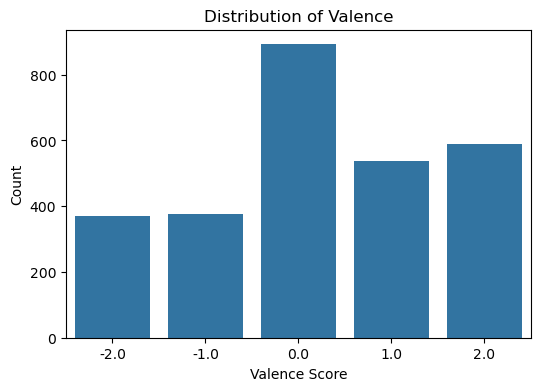

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['valence'], order=sorted(df['valence'].unique()))
plt.title("Distribution of Valence")
plt.xlabel("Valence Score")
plt.ylabel("Count")
plt.show()

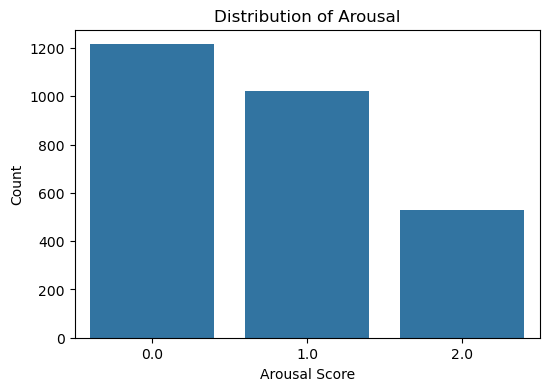

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['arousal'], order=sorted(df['arousal'].unique()))
plt.title("Distribution of Arousal")
plt.xlabel("Arousal Score")
plt.ylabel("Count")
plt.show()

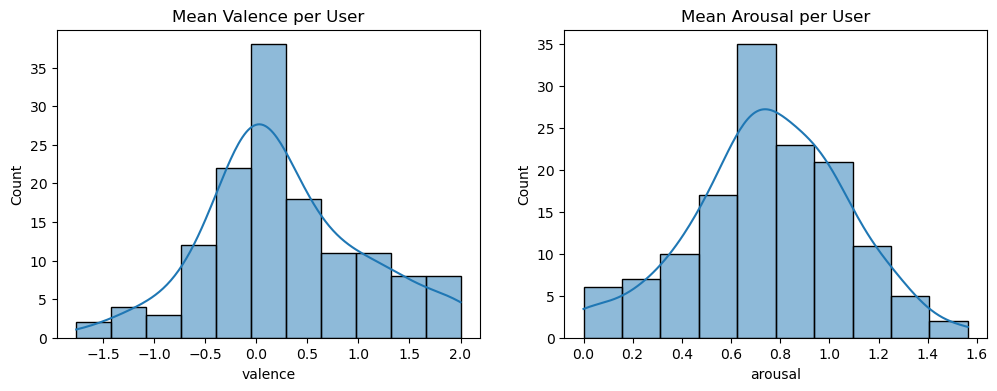

In [23]:
# Computing user level means for valence and arousal
user_stats = df.groupby("user_id")[["valence", "arousal"]].mean()

fig, ax = plt.subplots(1, 2, figsize=(12,4))

sns.histplot(user_stats['valence'], kde=True, ax=ax[0])
ax[0].set_title("Mean Valence per User")

sns.histplot(user_stats['arousal'], kde=True, ax=ax[1])
ax[1].set_title("Mean Arousal per User")

plt.show()

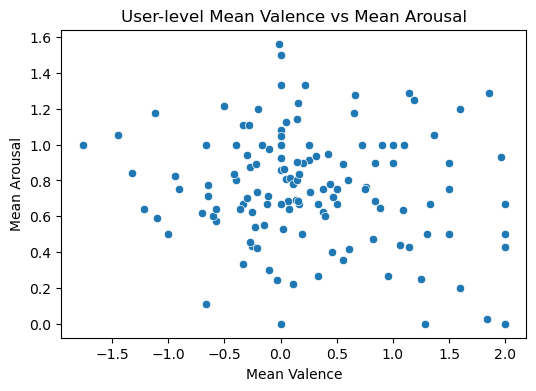

In [24]:
# The relationship between mean valence and mean arousal
plt.figure(figsize=(6,4))
sns.scatterplot(x=user_stats['valence'], y=user_stats['arousal'])
plt.title("User-level Mean Valence vs Mean Arousal")
plt.xlabel("Mean Valence")
plt.ylabel("Mean Arousal")
plt.show()

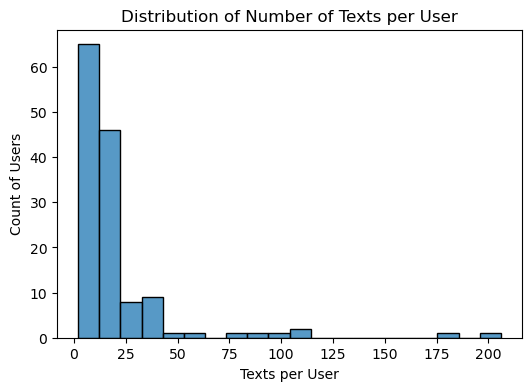

In [25]:
# Computing the numer of texts per user
texts_per_user = df['user_id'].value_counts()

plt.figure(figsize=(6,4))
sns.histplot(texts_per_user, bins=20, kde=False)
plt.title("Distribution of Number of Texts per User")
plt.xlabel("Texts per User")
plt.ylabel("Count of Users")
plt.show()


In [26]:
df.columns

Index(['user_id', 'text_id', 'text', 'timestamp', 'collection_phase',
       'is_words', 'valence', 'arousal', 'state_change_valence',
       'state_change_arousal', 'group', 'disposition_change_valence',
       'disposition_change_arousal'],
      dtype='object')

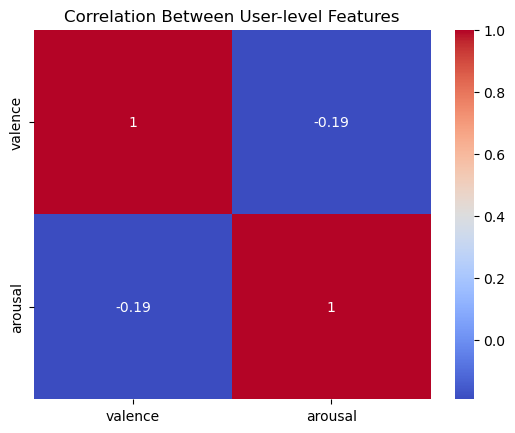

In [27]:
# Correlation matrix between valence and arousal
corr = user_stats.corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Between User-level Features")
plt.show()


<Axes: xlabel='collection_phase', ylabel='valence'>

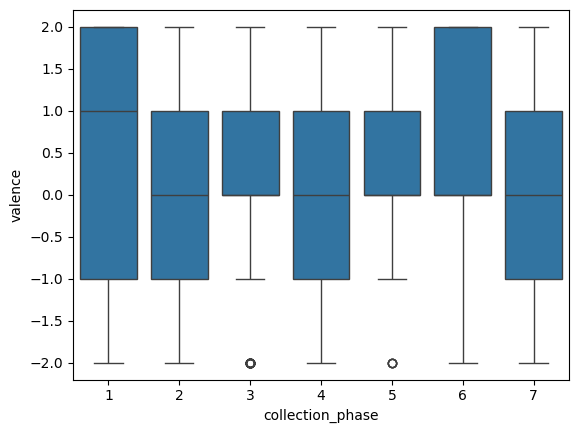

In [28]:
# Distributions of arousal and valence among the collection phases
sns.boxplot(x='collection_phase', y='valence', data=df)


<Axes: xlabel='collection_phase', ylabel='arousal'>

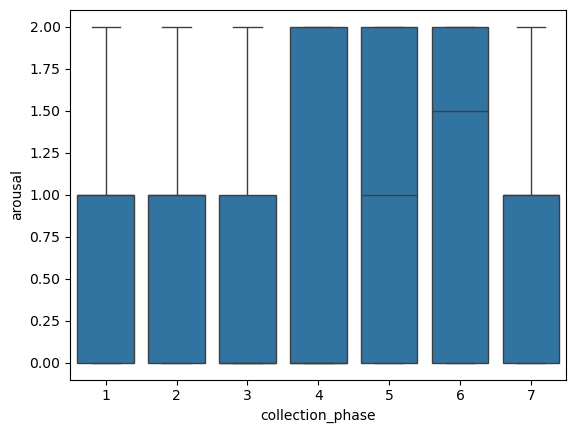

In [29]:
sns.boxplot(x='collection_phase', y='arousal', data=df)

<Axes: xlabel='is_words', ylabel='valence'>

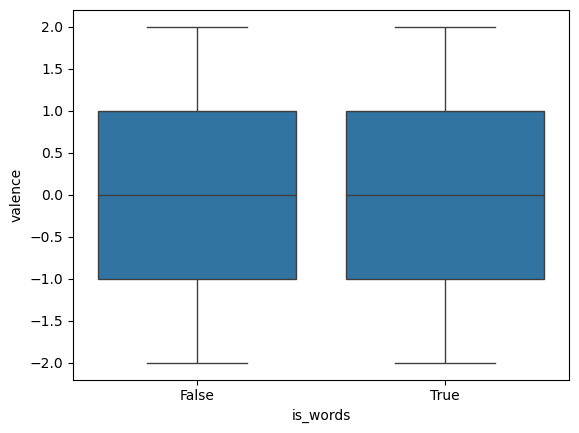

In [30]:
# Distributions of arousal and valence among the essays and feeling words
sns.boxplot(x='is_words', y='valence', data=df)

<Axes: xlabel='is_words', ylabel='arousal'>

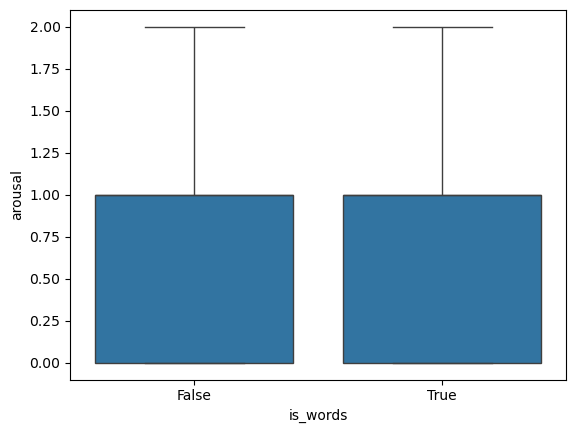

In [31]:
sns.boxplot(x='is_words', y='arousal', data=df)

In [32]:
# Analyzing the timestamp to see the time effects
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['weekday'] = df['timestamp'].dt.dayofweek

<Axes: xlabel='hour', ylabel='valence'>

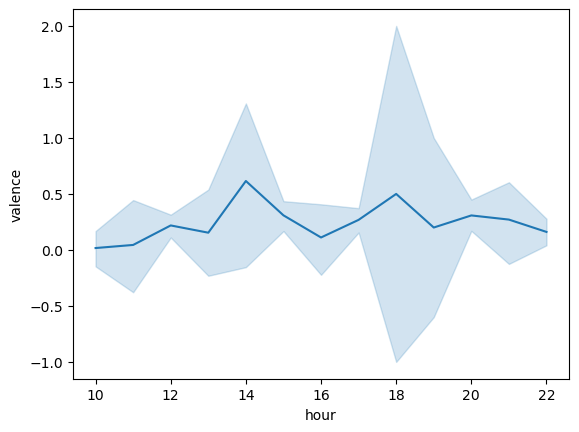

In [33]:
sns.lineplot(x='hour', y='valence', data=df)

<Axes: xlabel='weekday', ylabel='valence'>

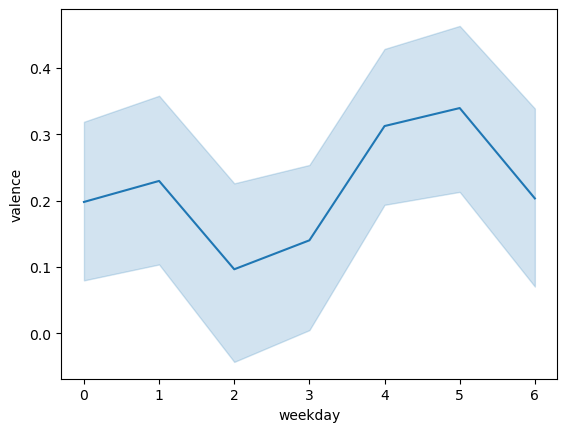

In [34]:
sns.lineplot(x='weekday', y='valence', data=df)

<Axes: xlabel='hour', ylabel='arousal'>

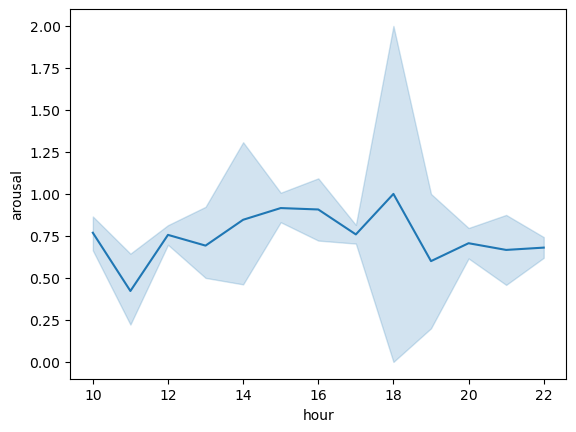

In [35]:
sns.lineplot(x='hour', y='arousal', data=df)

<Axes: xlabel='weekday', ylabel='arousal'>

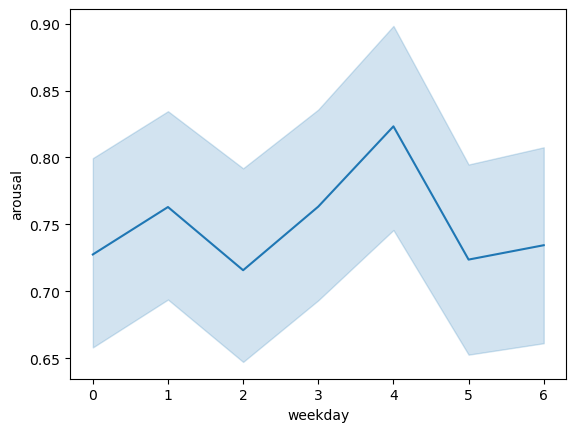

In [36]:
sns.lineplot(x='weekday', y='arousal', data=df)

<Axes: xlabel='group', ylabel='valence'>

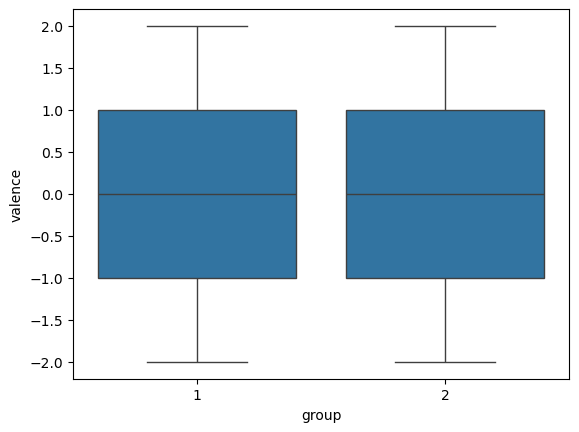

In [37]:
sns.boxplot(x='group', y='valence', data=df)

<Axes: xlabel='group', ylabel='arousal'>

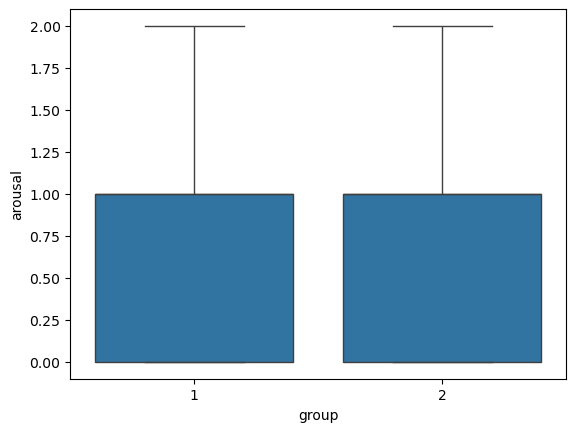

In [38]:
sns.boxplot(x='group', y='arousal', data=df)

In [39]:
# Text length vs emotion
df['text_len'] = df['text'].str.split().str.len()

<Axes: xlabel='text_len', ylabel='valence'>

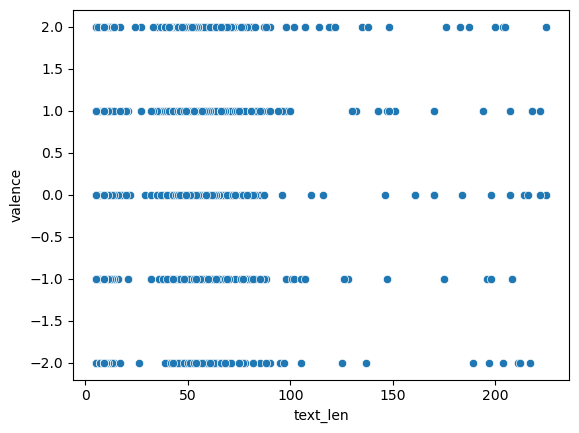

In [40]:
sns.scatterplot(x='text_len', y='valence', data=df)

<Axes: xlabel='lex_sent', ylabel='valence'>

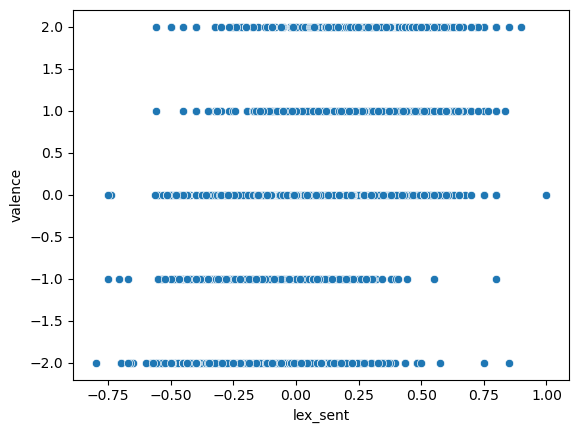

In [41]:
# Sentiment lexicon analysis
from textblob import TextBlob
df['lex_sent'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
sns.scatterplot(x='lex_sent', y='valence', data=df)

In [42]:
df.sample(5)

,user_id,text_id,text,timestamp,collection_phase,is_words,valence,arousal,state_change_valence,state_change_arousal,group,disposition_change_valence,disposition_change_arousal,hour,weekday,text_len,lex_sent
2060,124,2659,I am feeling ok because I want to start my day...,2024-11-10 12:03:48,7,False,0.0,1.0,0.0,0.0,2,0.400000,-0.150000,12,6,60,0.214031
832,16,860,"Tired , Drained , Mellow",2022-02-02 20:01:17,2,True,0.0,1.0,2.0,-1.0,1,0.236842,-0.342105,20,2,5,-0.400000
1464,161,4107,"Loved , Happy , Serenity , Peace , Confidence",2024-10-13 17:01:07,7,True,2.0,1.0,0.0,0.0,1,0.566667,-0.311111,17,6,9,0.750000
15,17,976,I’m okay today . Today is my day off . I’m not...,2021-06-14 12:08:34,1,False,-2.0,0.0,0.0,0.0,1,0.084906,0.007620,12,0,48,0.250000
1585,2,101,"Rested , Sore , Comfy , Content , Relaxed",2022-09-06 11:51:38,4,True,1.0,0.0,1.0,0.0,1,-0.158708,-0.189096,11,1,9,0.000000


In [43]:
# We will eliminate the features that failed to explain variance in valence and arousal 
cols_to_be_dropped = ['is_words', 'group', 'text_len', 'lex_sent', 'timestamp', 
                      'state_change_valence', 'state_change_arousal', 'disposition_change_valence', 'disposition_change_arousal']
df = df.drop(columns=cols_to_be_dropped)

In [44]:
df.sample(5)

,user_id,text_id,text,collection_phase,valence,arousal,hour,weekday
1579,2,55,"Relaxed , Content , Comfy , Chill , Fine",3,2.0,0.0,20,0
1778,40,3273,I got dressed and ready for my run . I am curr...,3,0.0,2.0,10,4
1526,2,35,"Content , Calm , Relaxed , Hungry , Happy",2,2.0,0.0,15,4
1572,2,84,"Comfy , Cozy , Relaxed , Tired , Hungry",3,2.0,0.0,20,4
565,145,3689,I feel sad and tired right now . It is a gross...,7,-1.0,1.0,12,2


In [46]:
# Train-Test Split on the dataset
from sklearn.model_selection import train_test_split

y = df[['valence', 'arousal']]
X = df.drop(columns=['valence', 'arousal'])

In [47]:
X.sample(5)

,user_id,text_id,text,collection_phase,hour,weekday
2084,124,2668,"Happy , Content , Hopeful , Happy , Cheerful",7,22,1
1355,121,2545,"Happy , Calm , Content , Neutral , Healthy",7,22,3
2570,77,5117,"Currently i feel stressed both emotionally , f...",7,12,1
756,11,471,I feel fine I’m out to eat with my friends I d...,2,15,0
1241,95,1195,"Bored , Sleepy , Quiet , Anxious , Annoyed",7,12,4


In [48]:
y.sample(5)

,valence,arousal
2111,2.0,0.0
740,2.0,0.0
1369,0.0,1.0
147,2.0,1.0
739,0.0,1.0


In [49]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)